In [1]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READING THE DATA

data = pd.read_csv('C://Users//AM3855//Downloads//sentiment_tweets3.csv')

In [3]:
# REVIEW THE DATA

data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
# RENAMING COLUMNS

data = data.rename(columns = {"message to examine":"Text", "label (depression result)" :"Category" })

In [5]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

data = data[["Text", "Category"]]

In [6]:
#REVIEW DATA AFTER CHANGES

data.head(5)

,Text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [7]:
# CHECK THE SHAPE OF THE DATA

data.shape

(10314, 2)

In [8]:
# CHECK INFO REGARDING IT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [9]:
# CHECK IF THERE ARE NULL VALUES

data.isnull().sum()

Text        0
Category    0
dtype: int64

In [10]:
# REMOVING DUPLICATE VALUES

data = data.drop_duplicates()

In [11]:
# CHECKING ALL CATEGORIES

data["Category"].unique()

array([0, 1], dtype=int64)

In [12]:
# RENAMING COLUMNS TO MAKE UNDERSTANDING OF EXPLORATION RESULTS EASIER

data['Category'] = data['Category'].replace(0,'Not Depressed')
data['Category'] = data['Category'].replace(1,'Depressed')

In [13]:
# CHECKING NO. OF CATEGORIES

data["Category"].value_counts()

Not Depressed    7996
Depressed        2287
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

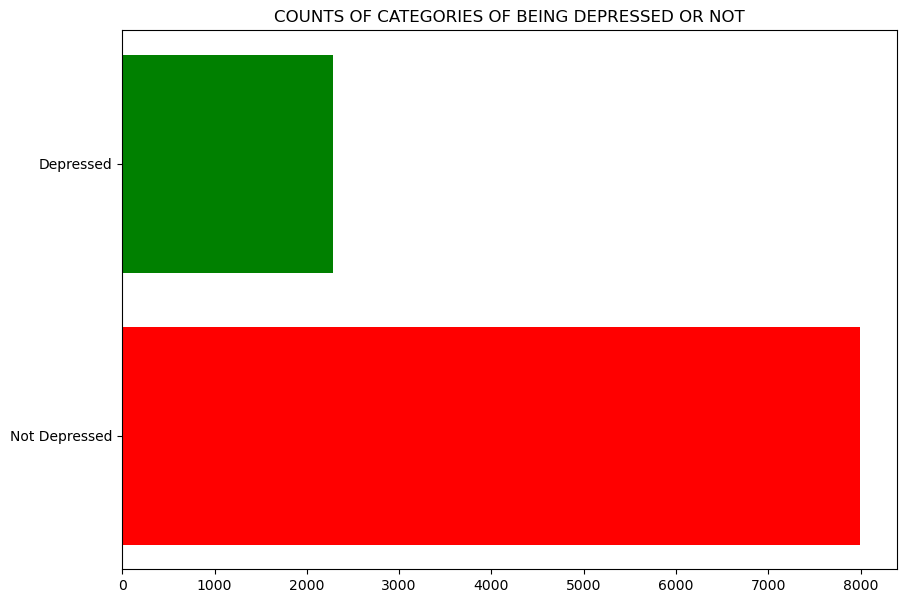

In [14]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(10, 7))
plt.barh(data["Category"].unique(), data["Category"].value_counts(), 
         color =['red', 'green'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

In [15]:
# INSTALLING WORDCLOUD PACKAGE TO VISUALIZE RESULTS

%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


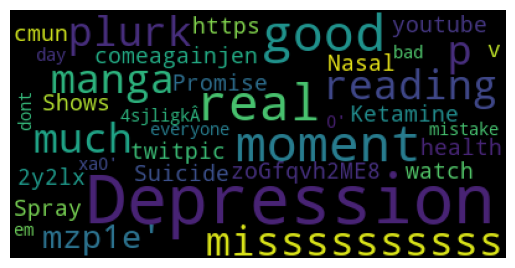

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [16]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

from wordcloud import WordCloud, STOPWORDS
text = data['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None) 

In [17]:
# RENAMING COLUMNS BACK TO INITIAL ENCODED NUMBERS AS EXPLORATION IS OVER AND WE SHALL NEED ENCODED NUMBERS FOR FURTHER ANALYSIS

data['Category'] = data['Category'].replace('Not Depressed', 0)
data['Category'] = data['Category'].replace('Depressed', 1)